In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.2 MB/s eta 0:00:00


In [3]:
!pip install implicit
from implicit.bpr import BayesianPersonalizedRanking

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 14.7 MB/s eta 0:00:00


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
final = pd.read_csv('/content/drive/MyDrive/최종프로젝트/final.csv')
final_enco = pd.read_csv('/content/drive/MyDrive/최종프로젝트/fi_inco.csv')

In [6]:
cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_CONT_PVT.csv')        # 보험계약정보

In [7]:
num = ['CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '기타', '배책',
       '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']
cate = ['GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']

In [8]:
final = final.drop(columns=['index'])
final

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58423,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
58424,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
58425,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
final_enco = final_enco.drop(columns=['index'])
final_enco

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [10]:
cont

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,999912,10,2,1,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,999912,33,2,20,0,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,7995898,0,7,2,201409,999912,201409,999912,999912,999912,52,2,30,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,8,9743978,0,4,7,201604,201704,201604,201704,999912,999912,170,3,1,0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,6,9040681,0,4,2,201804,999912,201804,204804,999912,202006,43,2,25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368478,8,6242384,0,7,2,201212,999912,201212,203812,999912,999912,47,2,10,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368479,6,2265670,0,14,5,201604,999912,201604,201604,999912,999912,31,1,0,0,1,99,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368480,6,6050915,0,7,7,200902,201107,200902,201902,999912,999912,15,2,10,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
368481,6,9901184,0,14,2,201809,999912,201809,201902,999912,999912,96,1,0,0,1,5,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 업권 코드 붙이기

In [11]:
final = pd.merge(final, cont[['POL_SN', 'SCTR_CD']], on='POL_SN', how='left')
final

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,SCTR_CD
0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
4,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84737,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6
84738,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
84739,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
84740,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6


In [12]:
final_enco = pd.merge(final_enco, cont[['POL_SN', 'SCTR_CD']], on='POL_SN', how='left')
final_enco

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,SCTR_CD
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8
2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,3
3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
4,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84737,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,6
84738,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
84739,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
84740,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,6


In [13]:
final[final['SCTR_CD'].isnull()]

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,SCTR_CD


In [14]:
final_enco[final_enco['SCTR_CD'].isnull()]

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,SCTR_CD


In [15]:
final.rename(columns={'SCTR_CD': '업권'}, inplace=True)
final_enco.rename(columns={'SCTR_CD': '업권'}, inplace=True)

In [16]:
df = final[final.duplicated(keep=False)].sort_values(by='POL_SN')
df.to_csv('final_업권분류_중복.csv', index=False, encoding='utf-8-sig')

In [17]:
df2 = df.groupby(['POL_SN'])['업권'].nunique().reset_index()
df2[df2['업권'] > 1]

,POL_SN,업권


In [18]:
final.drop_duplicates(keep='first', inplace=True)
final

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,업권
0,15110,2197182,C,2,25,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,56423,254040,C,2,28,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,817293,5884271,C,1,41,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
5,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84735,1892963,8605817,C,1,36,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
84737,1898196,5285028,C,1,25,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6
84738,1942749,6650657,C,1,24,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
84740,1946706,8536828,C,2,52,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6


In [19]:
df3 = final_enco.groupby(['POL_SN'])['업권'].nunique().reset_index()
df3[df3['업권'] > 1]

,POL_SN,업권


In [20]:
final_enco.drop_duplicates(keep='first', inplace=True)
final_enco

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8
2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,3
3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
5,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84735,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
84737,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,6
84738,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,6
84740,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,6


In [21]:
final['업권'].replace({3: 0, 6: 1, 8: 2}, inplace=True)
display(final['업권'].unique())
final_enco['업권'].replace({3: 0, 6: 1, 8: 2}, inplace=True)
display(final_enco['업권'].unique())

array([2, 0, 1])

array([2, 0, 1])

In [22]:
final.to_csv('final_업권분류.csv', index=False, encoding='utf-8-sig')
final_enco.to_csv('final_enco_업권분류.csv', index=False, encoding='utf-8-sig')

In [23]:
'''exclude_col = ['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT',
               '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']

for_bpr = final_enco.drop(columns=exclude_col)
for_bpr'''

"exclude_col = ['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT',\n               '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']\n\nfor_bpr = final_enco.drop(columns=exclude_col)\nfor_bpr"

# 업권 분류, 차원 축소, 클러스터링

In [24]:
from scipy.sparse import csr_matrix
bpr =  BayesianPersonalizedRanking(factors=1)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

## final

### 업권 분류

In [27]:
final.columns

Index(['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '업권'],
      dtype='object')

In [28]:
final_0 = final[final['업권'] == 0]
final_1 = final[final['업권'] == 1]
final_2 = final[final['업권'] == 2]

In [29]:
display(final_0.shape)
display(final_1.shape)
display(final_2.shape)

(3860, 28)

(32820, 28)

(21747, 28)

### 차원 축소

In [30]:
final0_claim = final_0[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]
final1_claim = final_1[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]
final2_claim = final_2[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]

In [31]:
final0_claim = minmaxscaler.fit_transform(final0_claim)
final1_claim = minmaxscaler.fit_transform(final1_claim)
final2_claim = minmaxscaler.fit_transform(final2_claim)

In [32]:
final0_claim_pca = pca.fit_transform(final0_claim)
final0_claim_pca

array([[-0.01866864],
       [-0.01866864],
       [-0.01866864],
       ...,
       [-0.01866864],
       [-0.01866864],
       [-0.01866864]])

In [33]:
final1_claim_pca = pca.fit_transform(final1_claim)
final1_claim_pca

array([[-0.00964515],
       [-0.00964515],
       [-0.00964515],
       ...,
       [-0.00964515],
       [-0.00964515],
       [-0.00964515]])

In [34]:
final2_claim_pca = pca.fit_transform(final2_claim)
final2_claim_pca

array([[-0.0091491],
       [-0.0091491],
       [-0.0091491],
       ...,
       [-0.0091491],
       [-0.0091491],
       [-0.0091491]])

In [35]:
pca_df0 = pd.DataFrame(final0_claim_pca, columns=['보험금지급'])
pca_df1 = pd.DataFrame(final1_claim_pca, columns=['보험금지급'])
pca_df2 = pd.DataFrame(final2_claim_pca, columns=['보험금지급'])

In [36]:
final_0.reset_index(drop=True, inplace=True)
final_1.reset_index(drop=True, inplace=True)
final_2.reset_index(drop=True, inplace=True)
# 기존 데이터와 차원 축소된 데이터 합칠 때 인덱스가 서로 다르면 행이 늘어남

### 수치형 데이터 정규화

In [37]:
final_00 = pd.concat([final_0, pca_df0], axis=1)
final_11 = pd.concat([final_1, pca_df1], axis=1)
final_22 = pd.concat([final_2, pca_df2], axis=1)

In [38]:
final_00

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,업권,보험금지급
0,1659127,5420542,C,2,46,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
1,798115,6197631,C,1,54,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
2,1023554,5005476,C,2,66,6,7,1,1,440,2,10,440.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
3,170502,9889265,C,2,30,3,1,1,1,15,2,20,15.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
4,589959,7408050,C,2,30,3,1,1,1,37,2,15,37.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.018669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,739373,1730793,C,2,41,4,3,1,1,13,2,30,13.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.018669
3856,1000079,1904540,C,2,47,4,2,1,1,40,2,10,40.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
3857,1959666,7140612,C,1,45,4,2,3,1,20,2,20,20.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669
3858,1170989,1633321,C,1,43,4,2,1,1,70,2,20,70.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.018669


In [39]:
final_00.columns

Index(['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'GENDER', 'AGE', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '업권', '보험금지급'],
      dtype='object')

In [40]:
final_0_num = final_00[['CT_PY_PD', 'mean_AMT']]
final_0_num = pd.DataFrame(minmaxscaler.fit_transform(final_0_num), columns=['CT_PY_PD', 'mean_AMT'])

final_1_num = final_11[['CT_PY_PD', 'mean_AMT']]
final_1_num = pd.DataFrame(minmaxscaler.fit_transform(final_1_num), columns=['CT_PY_PD', 'mean_AMT'])

final_2_num = final_22[['CT_PY_PD', 'mean_AMT']]
final_2_num = pd.DataFrame(minmaxscaler.fit_transform(final_2_num), columns=['CT_PY_PD', 'mean_AMT'])

In [41]:
final_0_cate = final_00[['GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]

final_1_cate = final_11[['GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]

final_2_cate = final_22[['GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD',
       'CT_PY_CYCLE_CD', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]

In [42]:
final_000 = pd.concat([final_0_cate, final_0_num, pca_df0], axis=1)
final_111 = pd.concat([final_1_cate, final_1_num, pca_df1], axis=1)
final_222 = pd.concat([final_2_cate, final_2_num, pca_df2], axis=1)

In [43]:
final_000

,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_CYCLE_CD,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,CT_PY_PD,mean_AMT,보험금지급
0,2,4,7,1,5,2,1,0,0,0,0.046875,0.035807,-0.018669
1,1,5,3,1,1,2,1,1,1,0,0.312500,0.009802,-0.018669
2,2,6,7,1,1,2,1,0,0,0,0.156250,0.087818,-0.018669
3,2,3,1,1,1,2,1,1,1,0,0.312500,0.002801,-0.018669
4,2,3,1,1,1,2,1,1,1,1,0.234375,0.007201,-0.018669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,2,4,3,1,1,2,1,1,1,1,0.468750,0.002400,-0.018669
3856,2,4,2,1,1,2,0,1,1,0,0.156250,0.007802,-0.018669
3857,1,4,2,3,1,2,0,1,1,0,0.312500,0.003801,-0.018669
3858,1,4,2,1,1,2,1,1,1,0,0.312500,0.013803,-0.018669


### k-prototype

In [44]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [45]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
help(KPrototypes)

Help on class KPrototypes in module kmodes.kprototypes:

class KPrototypes(kmodes.kmodes.KModes)
 |  KPrototypes(n_clusters=8, max_iter=100, num_dissim=<function euclidean_dissim at 0x7a52edf1c3a0>, cat_dissim=<function matching_dissim at 0x7a52edf1c1f0>, init='Cao', n_init=10, gamma=None, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-protoypes clustering algorithm for mixed numerical/categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 100
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  num_dissim : func, default: euclidian_dissim
 |      Dissimilarity function used by the algorithm for numerical variables.
 |      Defaults to the Euclidian dissimilarity function.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the kmo

In [ ]:
'''best_score = -1
best_clusters = None
best_gamma = None
gamma_range = np.linspace(0.1, 1, 10)

for n_clusters in range(2, 10):
    for gamma in gamma_range:
        kproto = KPrototypes(n_clusters=n_clusters, gamma=gamma, init='Huang')
        clusters = kproto.fit_predict(final_000, categorical=[0,1,2,3,4,5,6,7,8,9])
        score = silhouette_score(final_000, clusters)

        if score > best_score:
            best_score = score
            best_clusters = n_clusters
            best_gamma = gamma

fig, ax = plt.subplots(1, 1)
kproto = KPrototypes(n_clusters=best_clusters, gamma=best_gamma, init='Huang')
clusters = kproto.fit_predict(final_000, categorical=[0,1,2,3,4,5,6,7,8,9])
silhouette_vals = silhouette_samples(final_000, clusters)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(clusters):
    cluster_silhouette_vals = silhouette_vals[clusters==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_lower += len(cluster_silhouette_vals)'''

In [ ]:
best_score = -1
best_clusters = None
best_gamma = None
gamma_range = np.linspace(0.1, 1, 10)

for n_clusters in range(4, 10):
    for gamma in gamma_range:
        kproto = KPrototypes(n_clusters=n_clusters, gamma=gamma, init='Huang')
        clusters = kproto.fit_predict(final_111, categorical=[0,1,2,3,4,5,6,7,8,9])
        score = silhouette_score(final_111, clusters)

        if score > best_score:
            best_score = score
            best_clusters = n_clusters
            best_gamma = gamma

fig, ax = plt.subplots(1, 1)
kproto = KPrototypes(n_clusters=best_clusters, gamma=best_gamma, init='Huang')
clusters = kproto.fit_predict(final_111, categorical=[0,1,2,3,4,5,6,7,8,9])
silhouette_vals = silhouette_samples(final_111, clusters)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(clusters):
    cluster_silhouette_vals = silhouette_vals[clusters==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_lower += len(cluster_silhouette_vals)

In [ ]:
print(best_score)
print(best_clusters)
print(best_gamma)

## final_enco

In [ ]:
final_enco.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2'],
      dtype='object')

### 업권 분류

In [ ]:
final_enco_0 = final_enco[final_enco['업권'] == 0]
final_enco_1 = final_enco[final_enco['업권'] == 1]
final_enco_2 = final_enco[final_enco['업권'] == 2]

### 차원 축소

In [ ]:
dimen_red_insu_type = final_enco_0[['보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9']]
dimen_red_stat = final_enco_0[['보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4']]
dimen_red_channel = final_enco_0[['채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99']]
dimen_red_pyCycle = final_enco_0[['납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99']]
dimen_red_cover = final_enco[['GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]
dimen_red_claim = final_enco[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]

dimen_red_insu_type = final_enco_1[['보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9']]
dimen_red_stat = final_enco_1[['보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4']]
dimen_red_channel = final_enco_1[['채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99']]
dimen_red_pyCycle = final_enco_1[['납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99']]
dimen_red_cover = final_enco[['GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]
dimen_red_claim = final_enco[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]

dimen_red_insu_type = final_enco_2[['보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9']]
dimen_red_stat = final_enco_2[['보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4']]
dimen_red_channel = final_enco_2[['채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7', '채널_99']]
dimen_red_pyCycle = final_enco_2[['납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99']]
dimen_red_cover = final_enco[['GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4']]
dimen_red_claim = final_enco[['총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원', '화재/재물']]

In [ ]:
final0_claim_pca = pca.fit_transform(final0_claim)
final0_claim_pca

In [ ]:
dimen_red_claim_pca = pca.fit_transform(dimen_red_claim)

In [ ]:
dimen_red_claim_pca.shape

(58427, 1)

In [ ]:
dimen_red_insu_type2 = csr_matrix(dimen_red_insu_type)
dimen_red_stat2 = csr_matrix(dimen_red_stat)
dimen_red_channel2 = csr_matrix(dimen_red_channel)
dimen_red_pyCycle2 = csr_matrix(dimen_red_pyCycle)

In [ ]:
dimen_red_cover2 = csr_matrix(dimen_red_cover)

In [ ]:
bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_insu_type2)
dimen_red_insu_type_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_stat2)
dimen_red_stat_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_channel2)
dimen_red_channel_bpr = bpr.user_factors

bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_pyCycle2)
dimen_red_pyCycle_bpr = bpr.user_factors

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
bpr =  BayesianPersonalizedRanking(factors=1)
bpr.fit(dimen_red_cover2)
dimen_red_cover_bpr = bpr.user_factors

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
dimen_red_cover_bpr

array([[-0.12941693,  1.        ],
       [-0.1862549 ,  1.        ],
       [-0.04726158,  1.        ],
       ...,
       [ 0.09429488,  1.        ],
       [ 0.28877726,  1.        ],
       [-0.1066003 ,  1.        ]], dtype=float32)

In [ ]:
dimen_red_insu_type_bpr

array([[ 0.5646528 ,  1.        ],
       [ 0.12969059,  1.        ],
       [ 0.2436004 ,  1.        ],
       ...,
       [ 0.06922794,  1.        ],
       [ 0.05983355,  1.        ],
       [-0.01384693,  1.        ]], dtype=float32)

In [ ]:
dimen_red_insu_type_bpr.shape

(58427, 2)

In [ ]:
dimen_red_stat_bpr

array([[-0.423223  ,  1.        ],
       [ 0.15857986,  1.        ],
       [-0.10441022,  1.        ],
       ...,
       [ 0.456218  ,  1.        ],
       [ 0.30242705,  1.        ],
       [ 0.06914125,  1.        ]], dtype=float32)

In [ ]:
dimen_red_stat_bpr.shape

(58427, 2)

In [ ]:
dimen_red_channel_bpr

array([[ 0.09022811,  1.        ],
       [ 0.18235078,  1.        ],
       [ 0.06660569,  1.        ],
       ...,
       [-0.034819  ,  1.        ],
       [ 0.48798394,  1.        ],
       [ 0.23136151,  1.        ]], dtype=float32)

In [ ]:
dimen_red_channel_bpr.shape

(58427, 2)

In [ ]:
dimen_red_pyCycle_bpr

array([[0.5394183 , 1.        ],
       [0.37924248, 1.        ],
       [0.14459905, 1.        ],
       ...,
       [0.5016279 , 1.        ],
       [0.43382576, 1.        ],
       [0.7522492 , 1.        ]], dtype=float32)

In [ ]:
dimen_red_pyCycle_bpr.shape

(58427, 2)

In [ ]:
bpr_df1 = pd.DataFrame(dimen_red_insu_type_bpr, columns=['보종', '2']).drop(columns=['2'])
bpr_df2 = pd.DataFrame(dimen_red_stat_bpr, columns=['보험상태', '2']).drop(columns=['2'])
bpr_df3 = pd.DataFrame(dimen_red_channel_bpr, columns=['가입채널', '2']).drop(columns=['2'])
bpr_df4 = pd.DataFrame(dimen_red_pyCycle_bpr, columns=['납입주기', '2']).drop(columns=['2'])
bpr_df5 = pd.DataFrame(dimen_red_cover_bpr, columns=['담보', '2']).drop(columns=['2'])

In [ ]:
pca_df = pd.DataFrame(dimen_red_claim_pca, columns=['보험금지급'])

In [ ]:
final_bpr = pd.concat([final_enco, bpr_df1, bpr_df2, bpr_df3, bpr_df4, bpr_df5, pca_df], axis=1)
final_bpr

,level_0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58422,58422,1892963,8605817,1,3,6,4,7,10,1,0,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [ ]:
final_bpr.columns

Index(['level_0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2', '보종',
       '보험상태', '가입채널', '납입주기', '담보', '보험금지급'],
      dtype='object')

In [ ]:
drops = ['level_0', 'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2']

In [ ]:
final_bpr_drop = final_bpr.drop(columns=drops)
final_bpr_drop

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,15110,2197182,2,2,0,5000.0,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,56423,254040,2,2,5,170.0,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,1659127,5420542,2,4,3,180.0,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,817293,5884271,1,4,0,110.0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,798115,6197631,1,5,20,50.0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...,...,...
58422,1892963,8605817,1,3,0,10.0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,1898196,5285028,1,2,0,1.0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,1942749,6650657,1,2,0,6.0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,1946706,8536828,2,5,0,8.0,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [ ]:
final_bpr_drop.columns

Index(['JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'CT_PY_PD', 'mean_AMT',
       '보종', '보험상태', '가입채널', '납입주기', '담보', '보험금지급'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
final_bpr_drop_kmeans = final_bpr_drop[['GENDER', 'AGE_GROUP', 'CT_PY_PD', 'mean_AMT',
                                      '보종', '보험상태', '가입채널', '납입주기', '담보', '보험금지급']]
final_bpr_drop_kmeans

,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,2,2,0,5000.0,0.564653,-0.423223,0.090228,0.539418,-0.129417,-106.604397
1,2,2,5,170.0,0.129691,0.158580,0.182351,0.379242,-0.186255,-106.604397
2,2,4,3,180.0,0.243600,-0.104410,0.066606,0.144599,-0.047262,-106.604397
3,1,4,0,110.0,-0.204043,0.462272,-0.079714,0.621445,-0.112550,-106.604397
4,1,5,20,50.0,0.214953,0.091543,-0.447916,0.188792,-0.174491,-106.604397
...,...,...,...,...,...,...,...,...,...,...
58422,1,3,0,10.0,-0.414533,-0.038298,0.347487,0.460547,-0.325619,-106.604397
58423,1,2,0,1.0,0.117446,0.593836,0.008225,0.469574,0.371331,-106.604397
58424,1,2,0,6.0,0.069228,0.456218,-0.034819,0.501628,0.094295,-106.604397
58425,2,5,0,8.0,0.059834,0.302427,0.487984,0.433826,0.288777,-106.604397


In [ ]:
scaler = StandardScaler()
final_bpr_drop_kmeans.loc[:,:] = scaler.fit_transform(final_bpr_drop_kmeans)
final_bpr_drop_kmeans

,GENDER,AGE_GROUP,CT_PY_PD,mean_AMT,보종,보험상태,가입채널,납입주기,담보,보험금지급
0,0.961330,-1.447663,-1.432027,5.485298,1.824279,-1.455862,0.295443,1.784030,-0.447905,-0.093828
1,0.961330,-1.447663,-1.012055,-0.031289,0.419253,0.543239,0.597254,1.255216,-0.639858,-0.093828
2,0.961330,-0.174653,-1.180044,-0.019868,0.787207,-0.360407,0.218052,0.480550,-0.170451,-0.093828
3,-1.040225,-0.174653,-1.432027,-0.099818,-0.658782,1.586740,-0.261318,2.054838,-0.390942,-0.093828
4,-1.040225,0.461852,0.247863,-0.168347,0.694669,0.312898,-1.467617,0.626450,-0.600130,-0.093828
...,...,...,...,...,...,...,...,...,...,...
58422,-1.040225,-0.811158,-1.432027,-0.214034,-1.338713,-0.133243,1.138270,1.523640,-1.110515,-0.093828
58423,-1.040225,-1.447663,-1.432027,-0.224313,0.379699,2.038799,0.026787,1.553443,1.243218,-0.093828
58424,-1.040225,-1.447663,-1.432027,-0.218602,0.223945,1.565937,-0.114235,1.659267,0.307613,-0.093828
58425,0.961330,0.461852,-1.432027,-0.216318,0.193599,1.037504,1.598566,1.435421,0.964417,-0.093828


In [ ]:
n_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final_bpr_drop_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
final_bpr_drop_kmeans['군집'] = kmeans.labels_
final_bpr_drop_kmeans

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

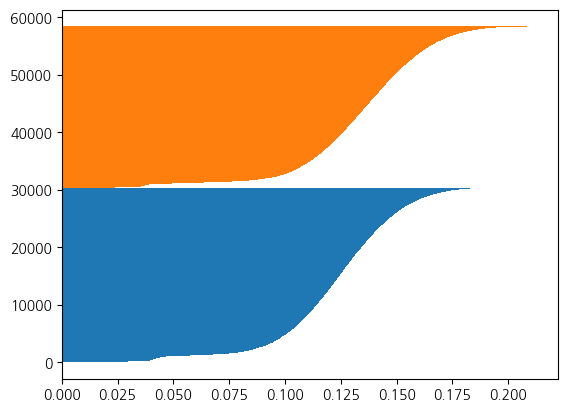

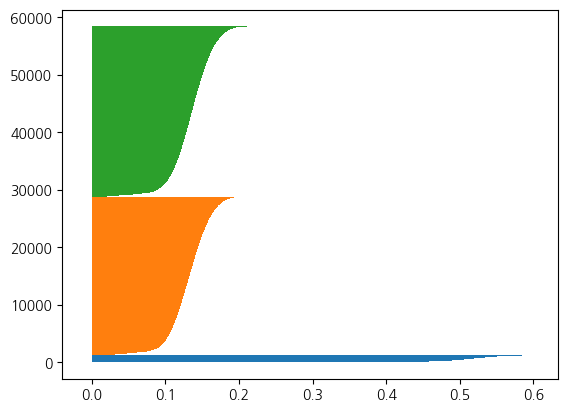

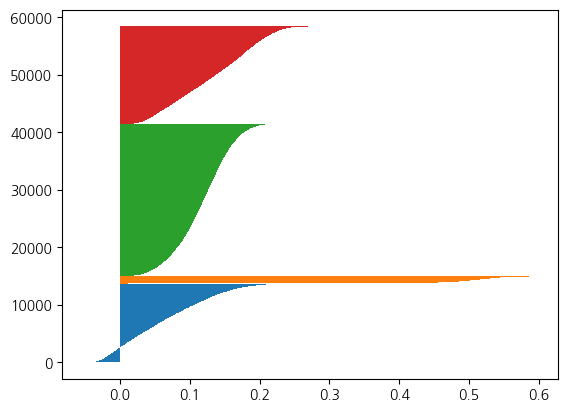

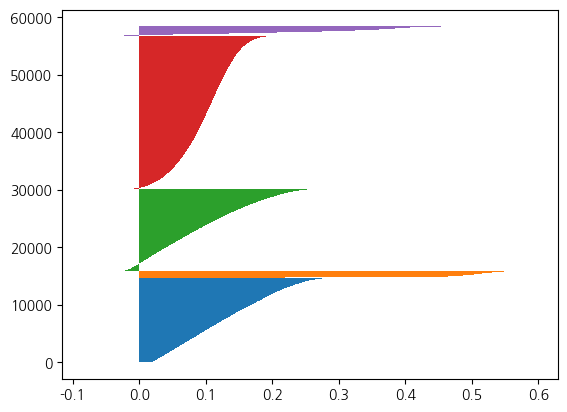

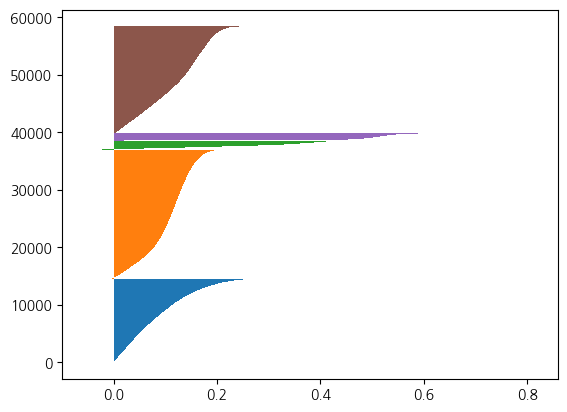

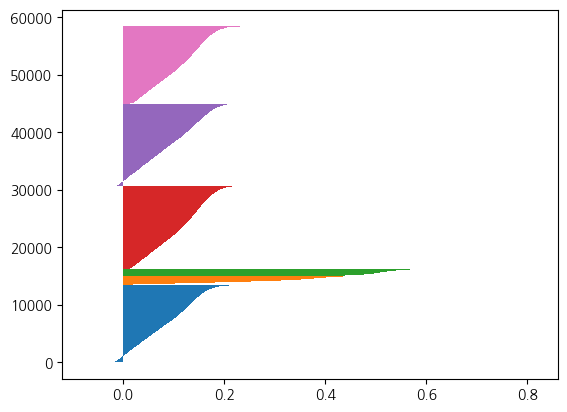

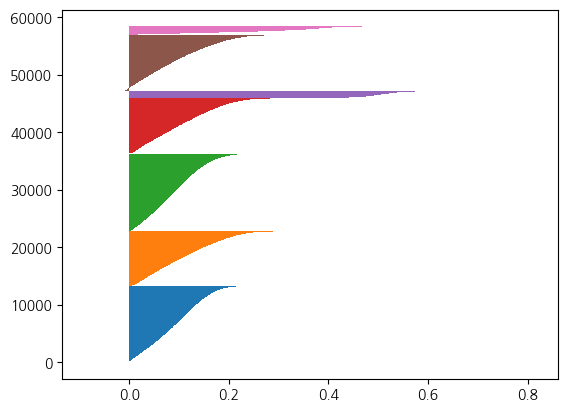

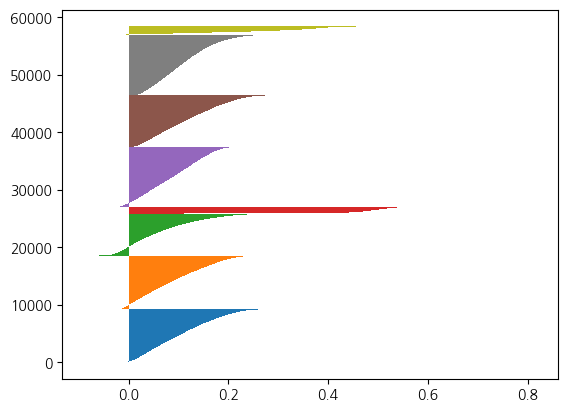

In [ ]:
for k in range(2, 10):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(final_bpr_drop_kmeans)
    silhouette_vals = silhouette_samples(final_bpr_drop_kmeans, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)